In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2794   | 2.868     | 2.256     | 5.552     |
| 5         | -0.2735   | 5.057     | 9.919     | 6.845     |
| 9         | -0.2203   | 1.35      | 4.899     | 6.183     |
| 36        | -0.1874   | 0.7752    | 9.303     | 3.553     |
| 41        | -0.18     | 0.01      | 7.71      | 4.502     |
| 43        | -0.18     | 0.01      | 10.0      | 3.79      |
| 48        | -0.07469  | 0.01      | 8.242     | 1.294     |
| 52        | -0.06681  | 0.01      | 8.697     | 1.224     |
| 53        | -0.05895  | 0.1847    | 8.579     | 0.8765    |
| 57        | -0.05583  | 0.01      | 9.262     | 1.17      |
| 75        | -0.05063  | 0.04445   | 8.274     | 0.9278    |
Curve params found
{'push': 0.044452851538481865,
 'shift': 8.274324279409841,
 'slope': 0.9278154390267732}
-
## Chance of nonscaling delay ##


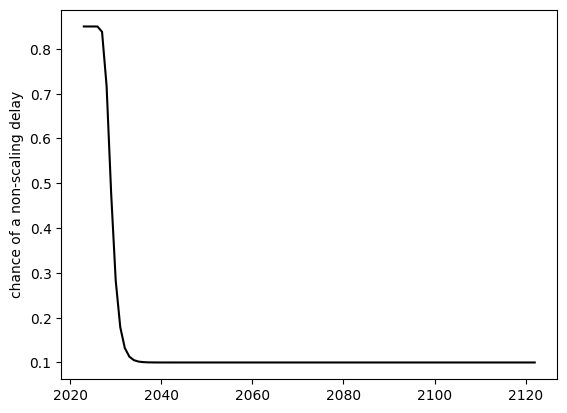

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 84%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 72%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 48%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.85),
                     (2027, 0.7),
                     (2030, 0.3),
                     (2035, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 8)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 30        | -0.08755  | 0.1406    | 8.295     | 1.075     |
| 52        | -0.02883  | 0.01      | 8.034     | 1.283     |
| 53        | -0.02006  | 0.01      | 7.574     | 1.472     |
| 81        | -0.007179 | 0.08162   | 5.553     | 0.8508    |
Curve params found
{'push': 0.08162179755435717,
 'shift': 5.553203917321071,
 'slope': 0.8508387555213864}
-
## Chance of nonscaling delay ##


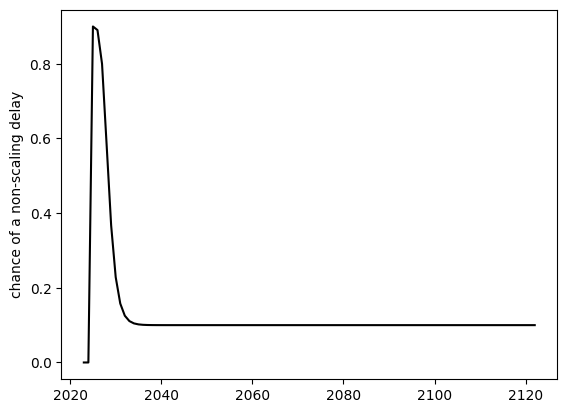

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 89%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2033 -

In [3]:
nonscaling_points = {'points': [(2023, 0.9),
                                (2027, 0.8),
                                (2030, 0.2),
                                (2050, 0.1)],
                     'init': 2024}
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1524   | 4.111     | 9.612     | 5.349     |
| 6         | -0.1289   | 1.403     | 2.721     | 1.516     |
| 12        | -0.09799  | 0.9914    | 4.889     | 5.266     |
| 14        | -0.07638  | 0.4773    | 8.004     | 5.623     |
| 19        | -0.06724  | 1.339     | 3.26      | 0.2106    |
Curve params found
{'push': 1.3392301154044761,
 'shift': 3.2604742051361355,
 'slope': 0.2105987773381311}
-
## Chance of nonscaling delay ##


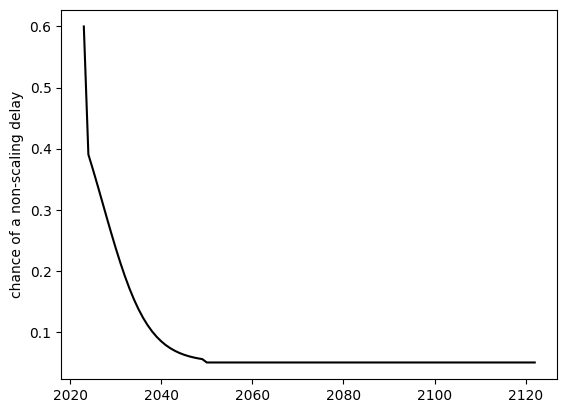

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 39%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 34%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 31%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2033

In [4]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.06033  | 0.5032    | 1.472     | 1.301     |
| 21        | -0.03941  | 0.08049   | 2.588     | 0.7353    |
| 54        | -0.01769  | 0.01      | 3.099     | 0.7986    |
Curve params found
{'push': 0.01, 'shift': 3.0987760393025603, 'slope': 0.7986322316950417}
-
## Chance of nonscaling delay ##


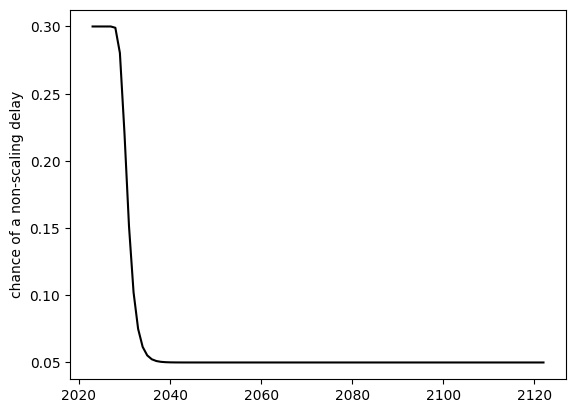

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [5]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.09151  | 8.218     | 2.061     | 5.897     |
| 3         | -0.07821  | 5.01      | 6.191     | 0.981     |
| 5         | -0.07155  | 3.815     | 7.255     | 0.9907    |
| 10        | -0.05477  | 1.286     | 3.303     | 2.591     |
| 16        | -0.05377  | 1.875     | 8.176     | 9.36      |
| 24        | -0.0428   | 0.9833    | 5.819     | 7.904     |
| 25        | -0.03344  | 0.2141    | 2.97      | 2.654     |
| 29        | -0.03336  | 0.2869    | 6.359     | 1.522     |
| 41        | -0.03333  | 0.01      | 7.804     | 5.26      |
| 43        | -0.03333  | 0.01      | 5.682     | 3.448     |
| 47        | -0.03333  | 0.05729   | 7.539     | 2.835     |
| 64        | -0.03333  | 0.01      | 5.191     | 2.305     |
| 68        | -0.03333  | 0.01      | 6.421     | 2.279     |
| 81        | -0.032    | 0.01      | 7.282     | 1.499     |
| 102   

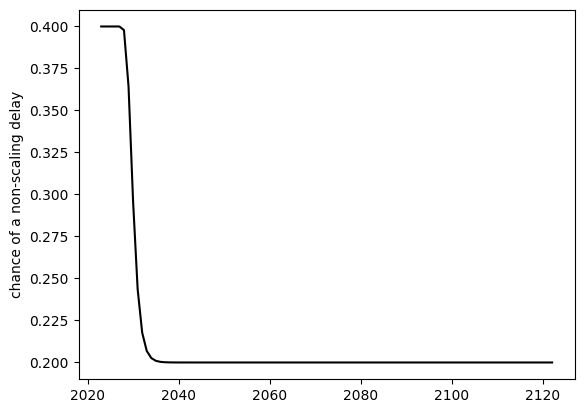

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 36%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2033

In [6]:
nonscaling_points = [(2023, 0.4),
                     (2030, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.1942   | 7.831     | 8.135     | 6.423     |
| 4         | -0.194    | 7.776     | 8.177     | 2.481     |
| 5         | -0.1      | 0.3014    | 8.966     | 1.588     |
| 41        | -0.1      | 0.01      | 7.211     | 4.802     |
| 44        | -0.1      | 0.01      | 10.0      | 3.536     |
| 47        | -0.09585  | 0.01      | 10.0      | 1.471     |
| 73        | -0.05697  | 0.4965    | 9.95      | 0.2436    |
| 76        | -0.04834  | 0.2229    | 9.986     | 0.4556    |
| 87        | -0.04515  | 0.2138    | 9.92      | 0.6176    |
Curve params found
{'push': 0.2138228051726355,
 'shift': 9.919905862939427,
 'slope': 0.6176326428783291}
-
## Chance of nonscaling delay ##


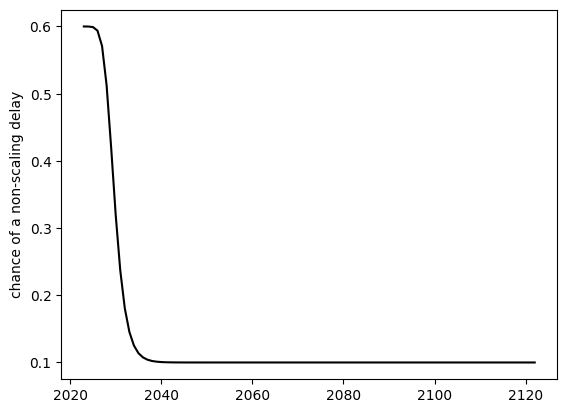

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 51%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 42%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.4),
                     (2050, 0.2),
                     (2080, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                            [0.1, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.07753  | 4.9       | 6.494     | 5.108     |
| 3         | -0.03958  | 0.6881    | 4.099     | 7.908     |
| 31        | -0.03753  | 0.812     | 8.445     | 7.836     |
| 41        | -0.03333  | 0.01      | 6.809     | 6.515     |
| 54        | -0.03333  | 0.01      | 3.029     | 4.187     |
| 66        | -0.03333  | 0.01      | 3.062     | 2.794     |
| 109       | -0.03333  | 0.01      | 10.0      | 2.552     |
| 120       | -0.03333  | 0.01      | 4.387     | 2.275     |
Curve params found
{'push': 0.01, 'shift': 4.386650334385638, 'slope': 2.27455413001894}
-
## Chance of nonscaling delay ##


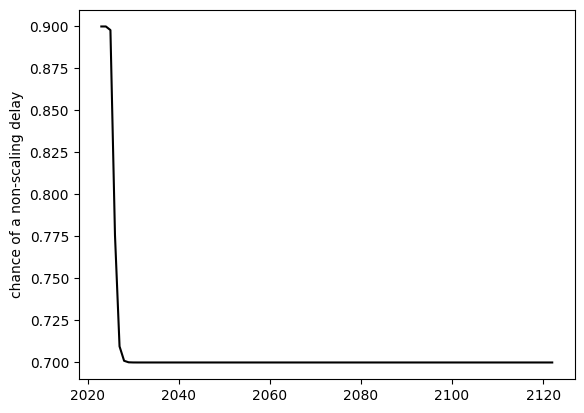

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 78%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 71%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2033

In [8]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff

nonscaling_points = [(2023, 0.9),
                     (2030, 0.8),
                     (2050, 0.7)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.3, 1],
                                                                        [0.7, sq.lognorm(1, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
